# Football Transfer Market Data Analysis

This notebook is based on the 'Football Data from Transfermarkt
Football (Soccer) data' on Kaggle, scraped from Transfermarkt website.

The notebook was created in March 2023, by David Coxon, with the purpose of exploring working sports data.

In [2]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import datetime
from datetime import datetime, timedelta, date
import warnings
import os

#settings
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 1200)
pd.set_option('display.width', 1200)
warnings.filterwarnings("ignore")
%matplotlib inline

#variables
colour=['maroon','r','g','darkgreen','c','teal','b','navy','indigo','m','deeppink','orange','sienna','yellow','khaki','olive','tan','black','grey','brown']

print("Packages installed")

Packages installed


# Get Data

In [3]:
# import all files in Data folder and read into dataframes
dataframes=[]
for dirname, _, filenames in os.walk('Data/'):
    for filename in filenames:
        file=filename.split('.')
        file=((file[0]+"_df"))
        if file !="_df":
            filepath=os.path.join(dirname,filename)
            df=pd.read_csv(filepath,sep=",",encoding = "UTF-8")
            exec(f'{file} = df.copy()')
            print(file, df.shape)
            dataframes.append(df)
print('Data imported')

#check encoding
with open('Data/players.csv') as f:
    print(f)

competitions_df (43, 12)
appearances_df (1137501, 13)
player_valuations_df (419678, 7)
game_events_df (551283, 7)
players_df (28482, 23)
games_df (60761, 21)
club_games_df (121522, 11)
clubs_df (411, 15)
Data imported
<_io.TextIOWrapper name='Data/players.csv' mode='r' encoding='UTF-8'>


# Data Engineering

In [171]:
# Calculate the age of each player
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])
# drop players with no date of birth
players_df = players_df[players_df['date_of_birth'].isnull() == False]
now = datetime.now()
players_df['age'] = (now - players_df['date_of_birth']).apply(lambda x: x.days) / 365.25
players_df['age'] = players_df['age'].round().astype(int) 
#print(players_df['date_of_birth'].head())

# add year to player valuations
player_valuations_df['datetime']=pd.to_datetime(player_valuations_df['datetime'], format="%Y-%m-%d")
player_valuations_df['year']=player_valuations_df['datetime'].dt.year

# add year to player valuations
appearances_df['datetime']=pd.to_datetime(appearances_df['date'], format="%Y-%m-%d")
appearances_df['year']=appearances_df['datetime'].dt.year

#add position top player valuations
position_df=players_df.copy()
position_df=position_df.drop(['name', 'current_club_id', 'current_club_name', 'country_of_citizenship', 'country_of_birth', 'city_of_birth', 'date_of_birth', 'foot', 'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur', 'agent_name', 'contract_expiration_date', 'current_club_domestic_competition_id', 'first_name', 'last_name', 'player_code', 'image_url', 'last_season', 'url', 'age'], axis=1)
player_valuations_df=player_valuations_df.merge(position_df, left_on='player_id', right_on='player_id')

#add position top player valuations
value_df=players_df.copy()
value_df=value_df.drop(['name', 'current_club_id', 'current_club_name', 'country_of_citizenship', 'country_of_birth', 'city_of_birth', 'date_of_birth', 'foot', 'height_in_cm', 'sub_position', 'highest_market_value_in_eur', 'agent_name', 'contract_expiration_date', 'current_club_domestic_competition_id', 'first_name', 'last_name', 'player_code', 'image_url', 'last_season', 'url', 'age'], axis=1)
appearances_df1=value_df.merge(appearances_df, left_on='player_id', right_on='player_id')

print("Data processing complete")

Data processing complete


# Clubs Total Market Value

Index(['club_id', 'club_code', 'name', 'domestic_competition_id', 'total_market_value', 'squad_size', 'average_age', 'foreigners_number', 'foreigners_percentage', 'national_team_players', 'stadium_name', 'stadium_seats', 'net_transfer_record', 'coach_name', 'url'], dtype='object')
(411, 15)


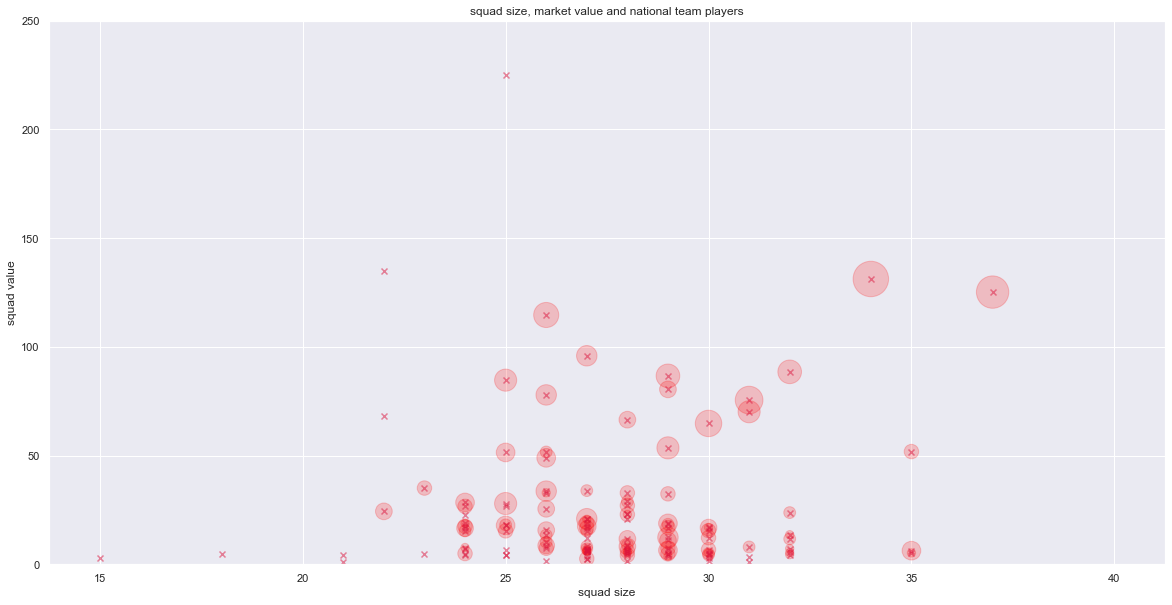

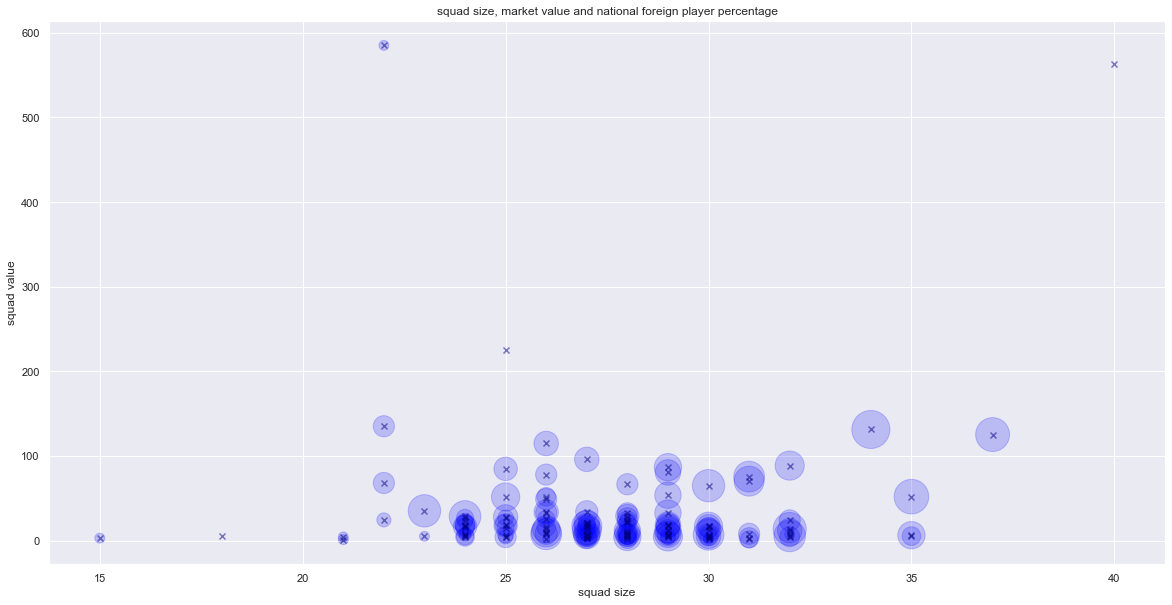

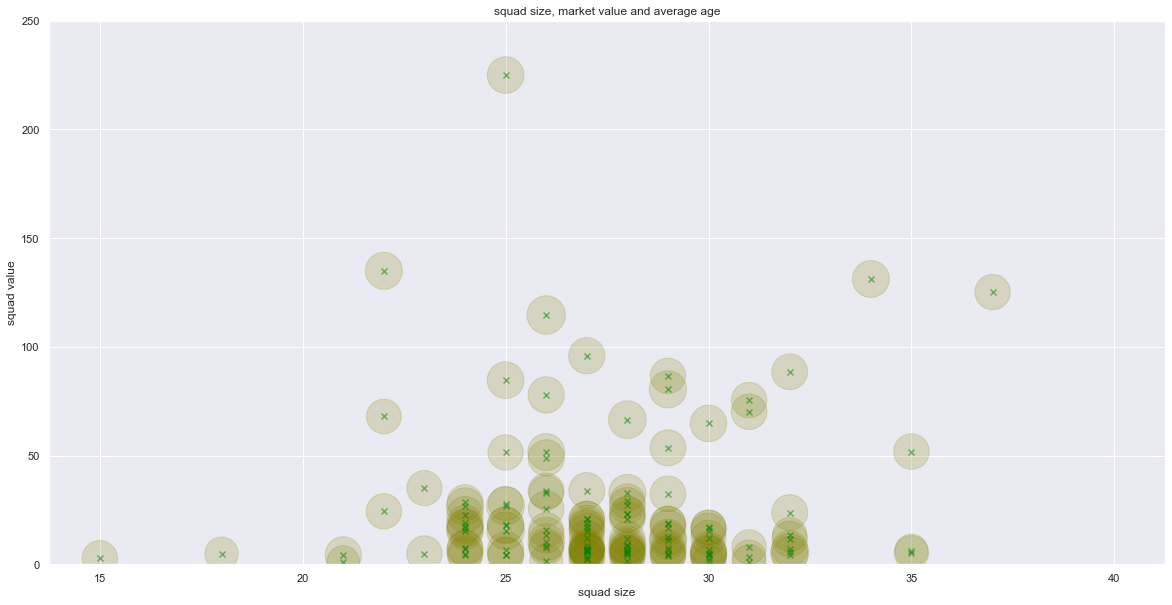

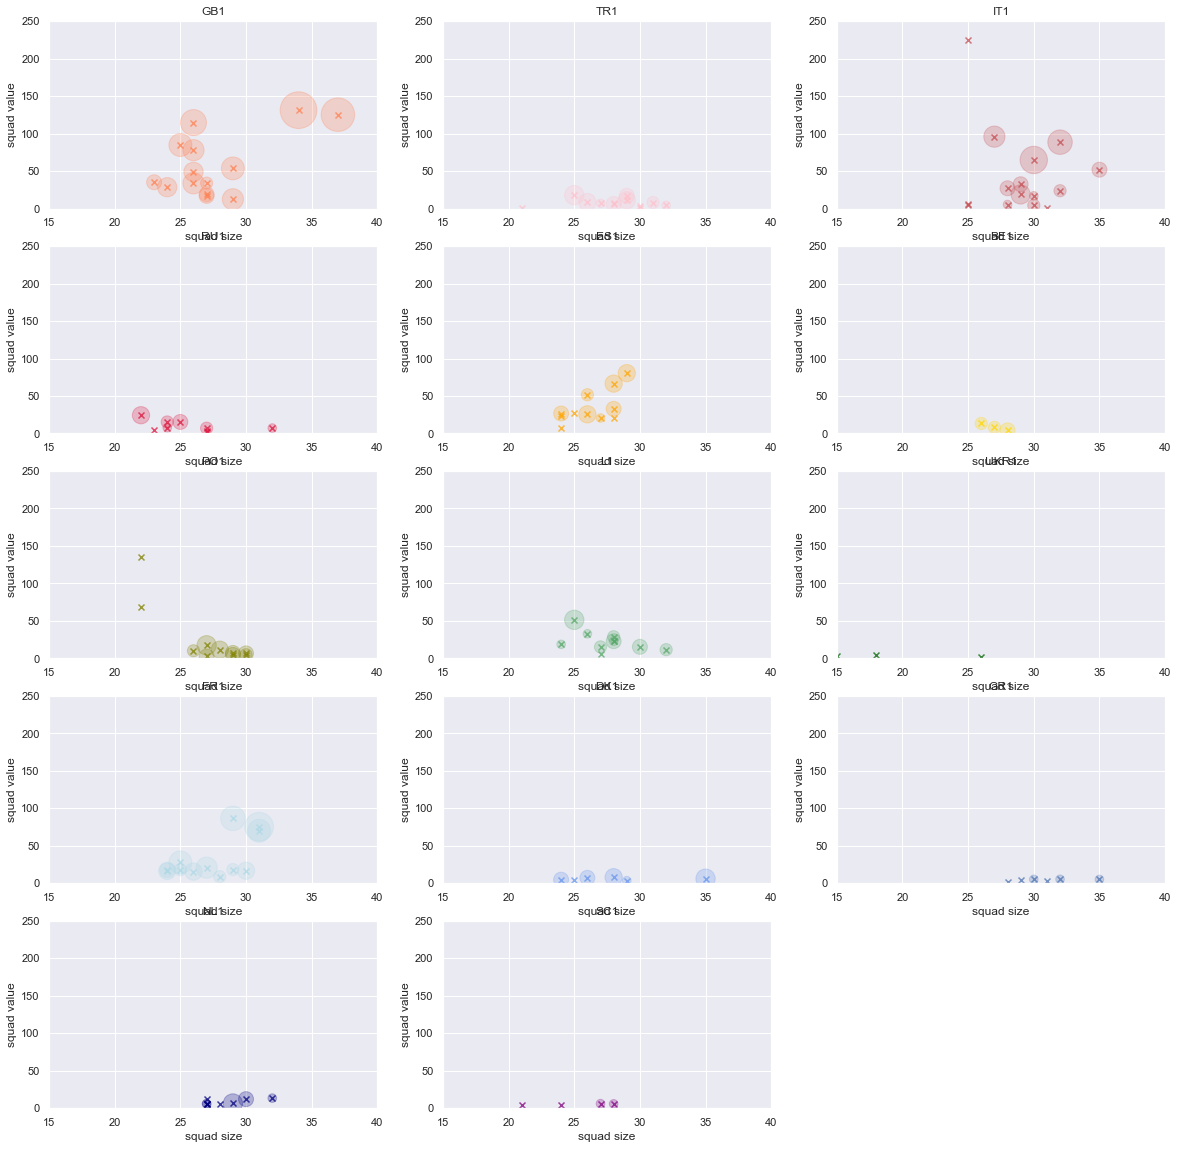

In [197]:
print(clubs_df.columns)
print(clubs_df.shape)

# Visualize of squad size, value and national team players
plt.scatter(clubs_df['squad_size'],y=clubs_df['total_market_value'], c='red',alpha=0.2, s=clubs_df['national_team_players']*70)
plt.scatter(clubs_df['squad_size'],y=clubs_df['total_market_value'], c='crimson',alpha=0.5, marker='x')
plt.ylim(0,250)
plt.xlabel('squad size'); plt.ylabel('squad value')
plt.title('squad size, market value and national team players')
plt.show()

# Visualize of squad size, value and national team players
plt.scatter(clubs_df['squad_size'],y=clubs_df['total_market_value'], c='blue',alpha=0.2, s=clubs_df['foreigners_number']*50)
plt.scatter(clubs_df['squad_size'],y=clubs_df['total_market_value'], c='navy',alpha=0.5, marker='x')
plt.xlabel('squad size'); plt.ylabel('squad value')
plt.title('squad size, market value and national foreign player percentage')
plt.show()

# Visualize of squad size, value and national team players
plt.scatter(clubs_df['squad_size'],y=clubs_df['total_market_value'], c='olive',alpha=0.2, s=clubs_df['average_age']*50)
plt.scatter(clubs_df['squad_size'],y=clubs_df['total_market_value'], c='green',alpha=0.5, marker='x')
plt.ylim(0,250) #;plt.xlim(15,40)
plt.xlabel('squad size'); plt.ylabel('squad value')
plt.title('squad size, market value and average age')
plt.show()

# Visualize of squad size, value and national team players
n=1;colour=['coral','pink','r','crimson','orange','gold','olive','g','darkgreen','lightblue','cornflowerblue','b','navy','purple']
leagues=clubs_df.domestic_competition_id.unique()
#fig, ax = plt.subplots(5, 3)
plt.figure(figsize=(20,20))
for league in leagues:
    plt.subplot(5,3,n);n=n+1
    clubs_df1 = clubs_df[(clubs_df.domestic_competition_id==league)] 
    plt.scatter(clubs_df1['squad_size'],y=clubs_df1['total_market_value'], label=league,color=colour[n-2],alpha=0.25, s=clubs_df1['national_team_players']*75)
    plt.scatter(clubs_df1['squad_size'],y=clubs_df1['total_market_value'], color=colour[n-2],alpha=0.75, marker='x')
    plt.xlabel('squad size'); plt.ylabel('squad value')
    plt.ylim(0,250);plt.xlim(15,40)
    plt.title(league);#plt.legend()
    fig.tight_layout()
plt.show()


## Observatios on clubs

The scatter plot show squad size which ranges from 15 to 40 against squad value, the points on the scatter point are transparent so the colour intensity is brighter where multiple clubs have the same squad size and value, the size of the points is determined by the number of national team players in the squad.
The chart appears to show that 4 of the clubs with the highest squad vales have no national team players, and that 3 of the top 6 clubs have relatively small squads 20-25 players.

# Player Valuation Data Visualization

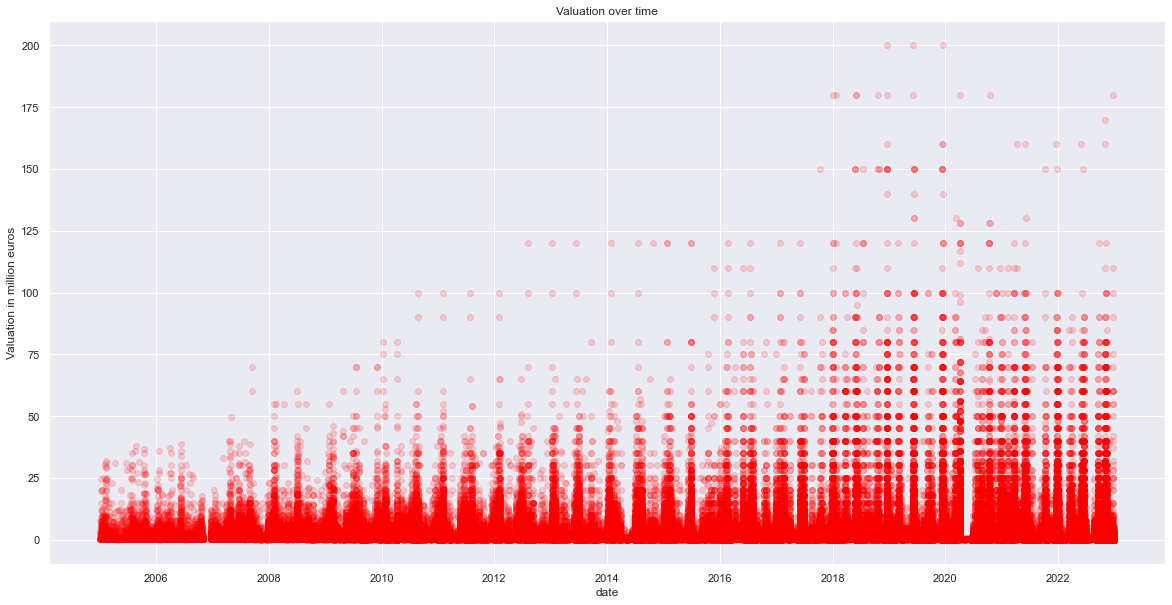

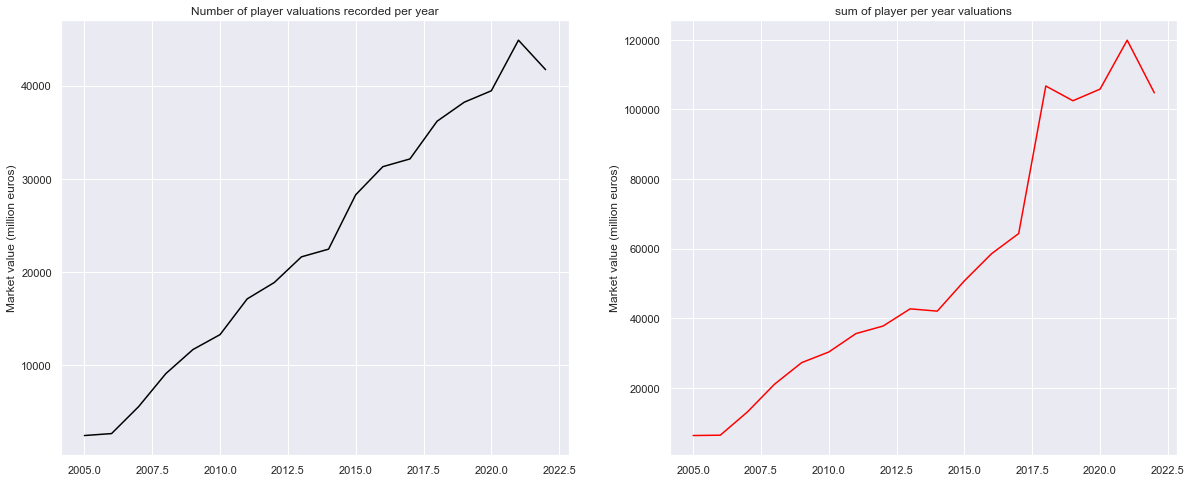

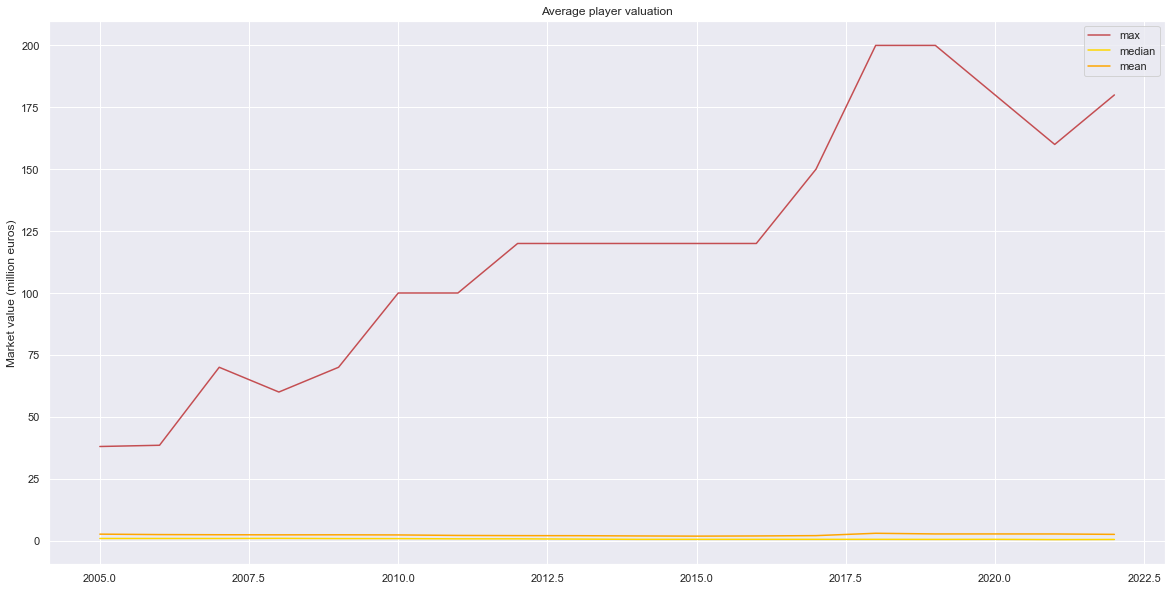

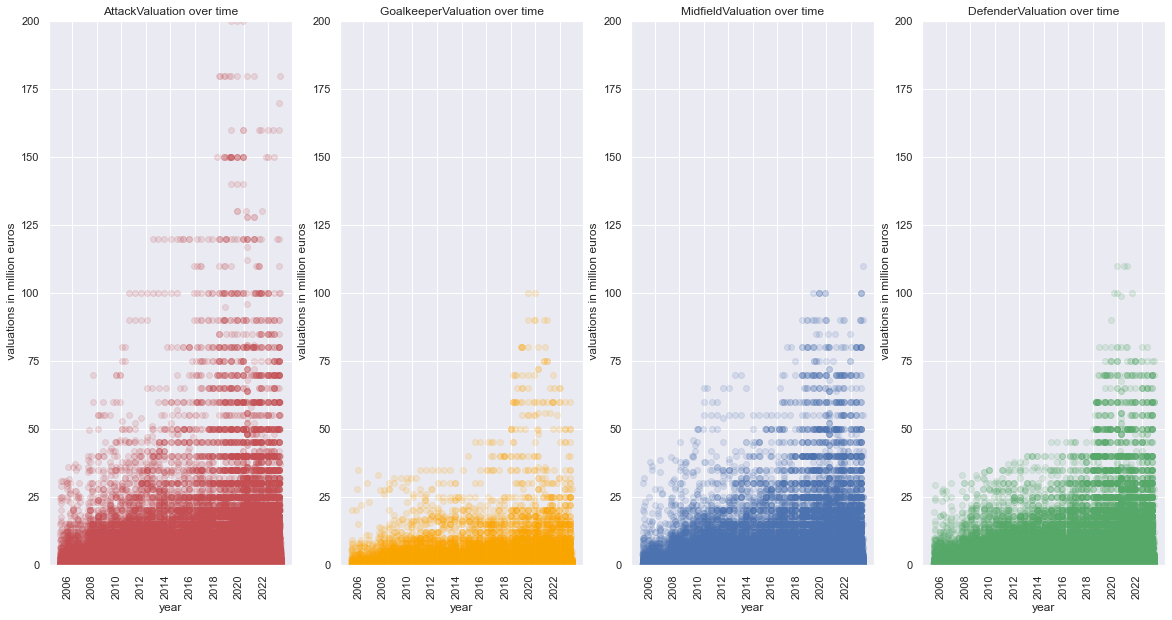

In [61]:
#filter range
player_valuations_df = player_valuations_df[(player_valuations_df.year > 2004 ) & (player_valuations_df.year < 2023 )]
high_value_player_valuations_df = player_valuations_df[(player_valuations_df.market_value_in_eur > 40000000 )]

# Lookat data
#print(player_valuations_df.describe())
#print(player_valuations_df.head())
#print(player_valuations_df.columns)

# Visualize of valuation data over time
plt.scatter(player_valuations_df['datetime'],y=player_valuations_df['market_value_in_eur']/1000000, c='red',alpha=0.15)
plt.xlabel('date')
plt.ylabel('Valuation in million euros')
plt.title('Valuation over time')
plt.show()

# Visualize of valuation data over time
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
yeargroups1 = player_valuations_df.loc[:,['market_value_in_eur', 'year']].groupby(['year']).count() \
    .sort_values(by='year', ascending=True)
yeargroups2 = player_valuations_df.loc[:,['market_value_in_eur', 'year']] .groupby(['year']).sum() \
    .sort_values(by='year', ascending=True)
yeargroups3 = player_valuations_df.loc[:,['market_value_in_eur', 'year']].groupby(['year']).max() \
    .sort_values(by='year', ascending=True)
yeargroups4 = player_valuations_df.loc[:,['market_value_in_eur', 'year']] .groupby(['year']).min() \
    .sort_values(by='year', ascending=True)
yeargroups5 = player_valuations_df.loc[:,['market_value_in_eur', 'year']].groupby(['year']).median() \
    .sort_values(by='year', ascending=True)
yeargroups6 = player_valuations_df.loc[:,['market_value_in_eur', 'year']].groupby(['year']).mean() \
    .sort_values(by='year', ascending=True)

plt.subplot(1, 2, 1)                 
plt.title('Number of player valuations recorded per year')
plt.plot(yeargroups1.index,yeargroups1,color='black')
plt.ylabel('Market value (million euros)')
plt.subplot(1, 2, 2)
plt.title('sum of player per year valuations')
plt.plot(yeargroups2.index,yeargroups2/1000000,color='red')
plt.ylabel('Market value (million euros)')
plt.savefig('Graphs/marketvaluetimeline.png')
plt.show()
plt.title('Average player valuation')
plt.plot(yeargroups3.index,yeargroups3/1000000,color='r',label='max')
#plt.plot(yeargroups4.index,yeargroups4/1000000,color='Yellow',label='min')
plt.plot(yeargroups5.index,yeargroups5/1000000,color='Gold',label='median')
plt.plot(yeargroups6.index,yeargroups6/1000000,color='Orange',label='mean')
plt.ylabel('Market value (million euros)')
plt.legend()
plt.show()

# valuation by position
n=1;colour=['yellow','r','orange','b','g']
for position in positions:
    plt.subplot(1,4,n);n=n+1
    player_valuations_df1 = player_valuations_df[(player_valuations_df.position==position)]                                             
    plt.scatter(player_valuations_df1['datetime'],y=player_valuations_df1['market_value_in_eur']/1000000, c=colour[n-1],alpha=0.15)
    plt.xlabel('year')
    plt.ylabel(' valuations in million euros')
    plt.title(position+'Valuation over time')
    plt.ylim(0,200)
    plt.xticks(rotation=90, ha='right')
    plt.savefig('Graphs/marketvaluebypositiontimeline.png')
plt.show()  

## Observations on market value timeline data

The scatter plot of player valuations over the period 2006 to 2022 shows that the value of players has generally risen over time. The plot shows that the vast majority of players are at the lower end of the scale below the 50 million euros mark. 

Separating player values in attack,midfield,defence and goal keeper positions shows attacking positions generally achieve the highest values will goal keepers command lower values. 

There appears to be a shift around 2018 in where values at the higher end of the scale in most positions rose dramatically, this appears to have peaked and come down a little to 2022 rates.

# Player Data Visualization

Explorator data visualizations relating to players who's last season played was 2022 or 2023 with a market value of greater that 15 million euros.

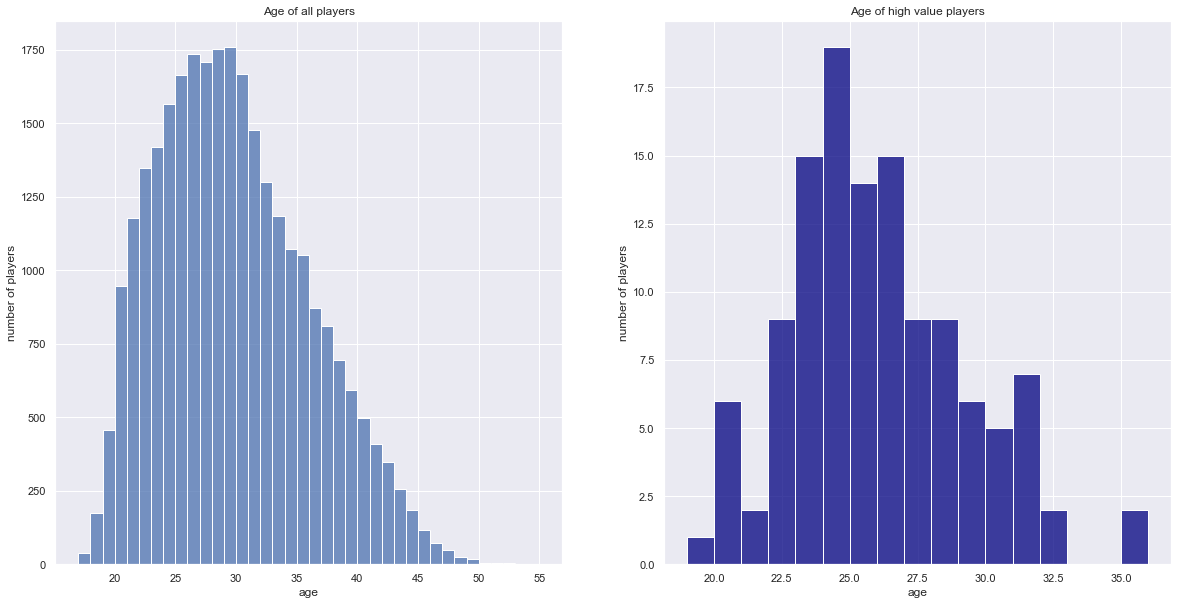

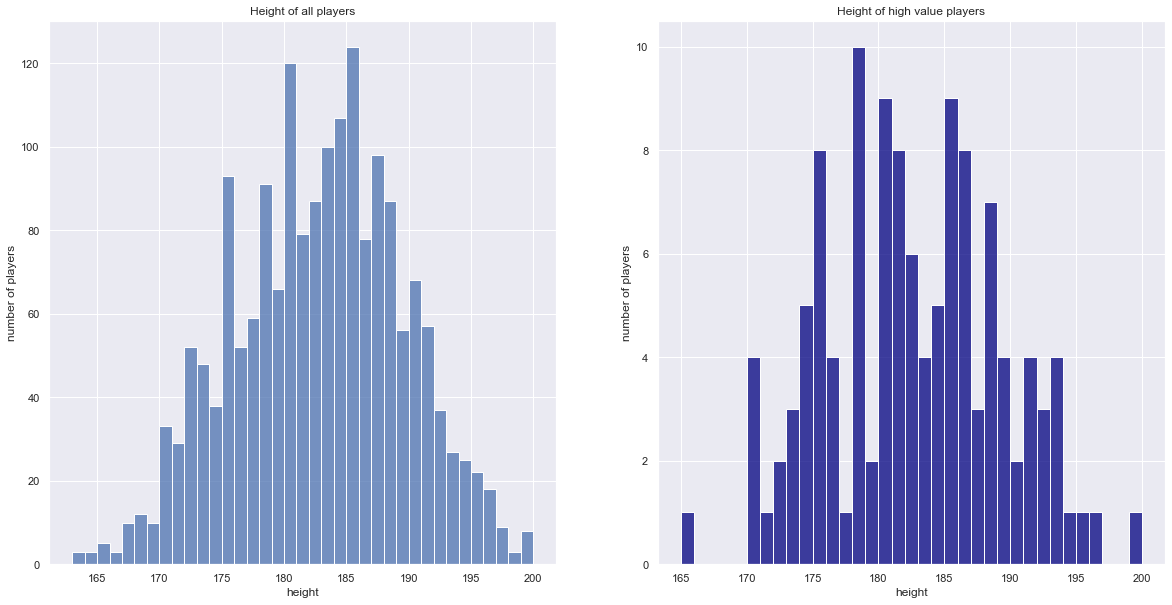

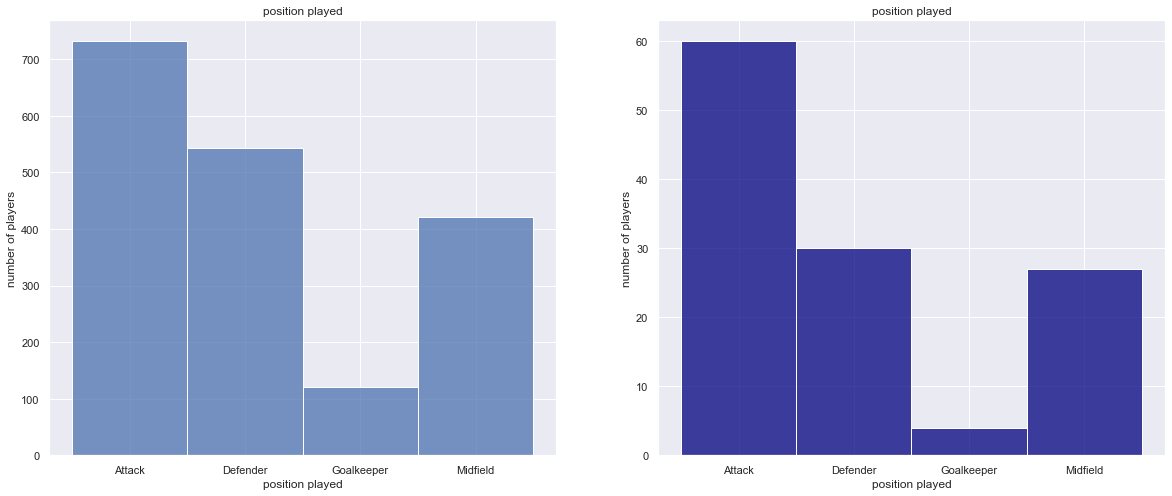

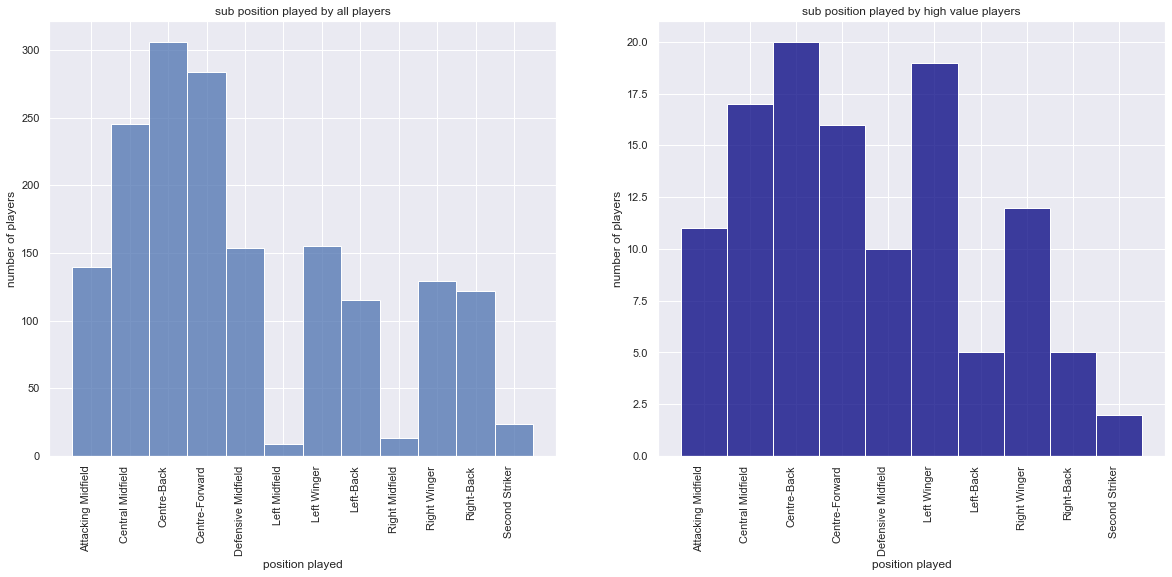

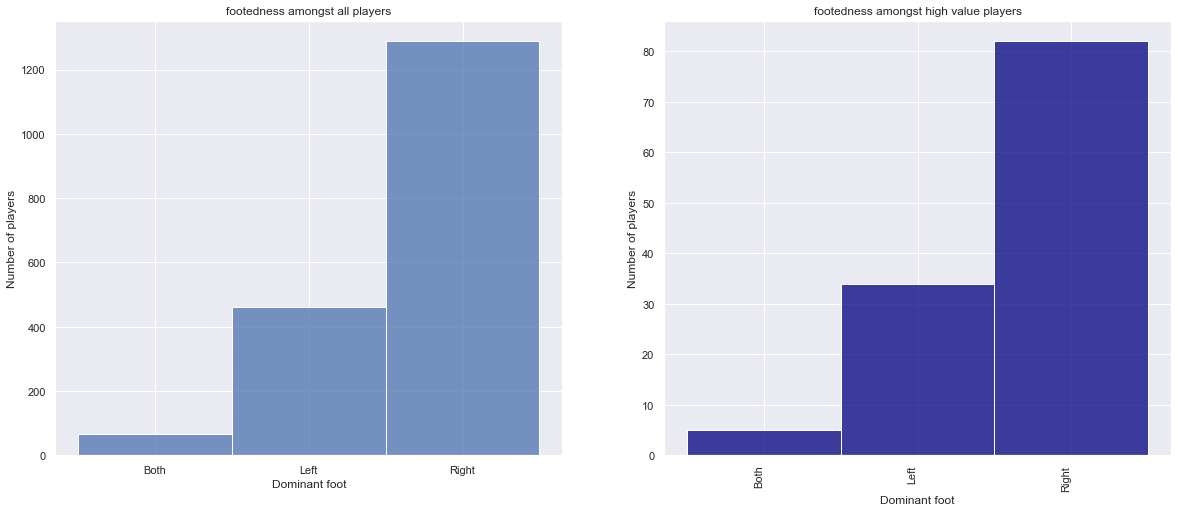

In [62]:
#overview of player dataset
#remove players with no Market Value
players_df1 = players_df[players_df.highest_market_value_in_eur.isnull() == False]
#order by Market Value
players_df1 = players_df1.sort_values("highest_market_value_in_eur", ascending = False)
#filter by season and value
players_df1 = players_df[players_df['last_season'] >= 2021]
players_df1 = players_df1[players_df1['highest_market_value_in_eur'] >= 10000000]
high_value_players_df = players_df1[(players_df1.market_value_in_eur > 40000000 )]
positions=players_df1.position.unique()

# Show player age distribution
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x='age',data=players_df, binwidth=1,color='b')
plt.title("Age of all players")
plt.xlabel('age'); plt.ylabel('number of players')
plt.savefig('Graphs/age.png')
plt.subplot(1, 2, 2)
sns.histplot(x='age',data=high_value_players_df, binwidth=1,color='navy')
plt.title("Age of high value players")
plt.xlabel('age'); plt.ylabel('number of players')
plt.savefig('Graphs/hv_age.png')

# Show player height distribution
players_df3 = players_df1[players_df1.height_in_cm.isnull() == False]
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x='height_in_cm',data=players_df3, binwidth=1,color='b')
plt.title("Height of all players")
plt.xlabel('height'); plt.ylabel('number of players')
plt.savefig('Graphs/height.png')
plt.subplot(1, 2, 2)
sns.histplot(x='height_in_cm',data=high_value_players_df1, binwidth=1,color='navy')
plt.title("Height of high value players")
plt.xlabel('height'); plt.ylabel('number of players')
plt.savefig('Graphs/hv_height.png')

# Show position data
players_df1 = players_df1.sort_values("position", ascending = True)
high_value_players_df1 = high_value_players_df1.sort_values("position", ascending = True)
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
plt.title("position played");plt.grid(True)
sns.histplot(x='position',data=players_df1, binwidth=1,color='b')
plt.xlabel('position played'); plt.ylabel('number of players')
plt.savefig('Graphs/position.png')
plt.subplot(1, 2, 2)
sns.histplot(x='position',data=high_value_players_df1, binwidth=1,color='navy')
plt.title("position played");plt.grid(True)
plt.xlabel('position played'); plt.ylabel('number of players')
plt.savefig('Graphs/hv_position.png')

# Show subposition data
players_df1 = players_df1.sort_values("sub_position", ascending = True)
high_value_players_df1 = high_value_players_df1.sort_values("sub_position", ascending = True)
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.histplot(x='sub_position',data=players_df1, binwidth=1,color='b')
plt.title("sub position played by all players");plt.grid(True)
plt.xlabel('position played'); plt.ylabel('number of players')
plt.xticks(rotation=90, ha='right');
plt.savefig('Graphs/subposition.png')
plt.subplot(1, 2, 2)
sns.histplot(x='sub_position',data=high_value_players_df1, binwidth=1,color='navy')
plt.title("sub position played by high value players");plt.grid(True)
plt.xlabel('position played'); plt.ylabel('number of players')
plt.xticks(rotation=90, ha='right');
plt.savefig('Graphs/hv_subposition.png')

# Show  footedness data
players_df1 = players_df1.sort_values("foot", ascending = True)
high_value_players_df1 = high_value_players_df1.sort_values("foot", ascending = True)
f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.subplot(1, 2, 1)
sns.histplot(x='foot',data=players_df1, binwidth=1,color='b')
plt.title("footedness amongst all players");plt.grid(True)
plt.xlabel('Dominant foot'); plt.ylabel('Number of players')
plt.savefig('Graphs/footedness.png')
plt.subplot(1, 2, 2)
sns.histplot(x='foot',data=high_value_players_df1, binwidth=1,color='navy')
plt.title("footedness amongst high value players");plt.grid(True)
plt.xlabel('Dominant foot'); plt.ylabel('Number of players')
plt.xticks(rotation=90, ha='right');
plt.savefig('Graphs/hvfootedness.png')

## Observations on player data visualizations

Generally the distibutions of age is a skewed normal distribution and height is a normal distribution.
Distibutions amongst high value players appear to be reflective of values within the entire dataset.

# Appearance Visualizations

Index(['appearance_id', 'game_id', 'player_id', 'player_club_id', 'player_current_club_id', 'date', 'player_name', 'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played', 'datetime', 'year'], dtype='object')
(1098898, 15)


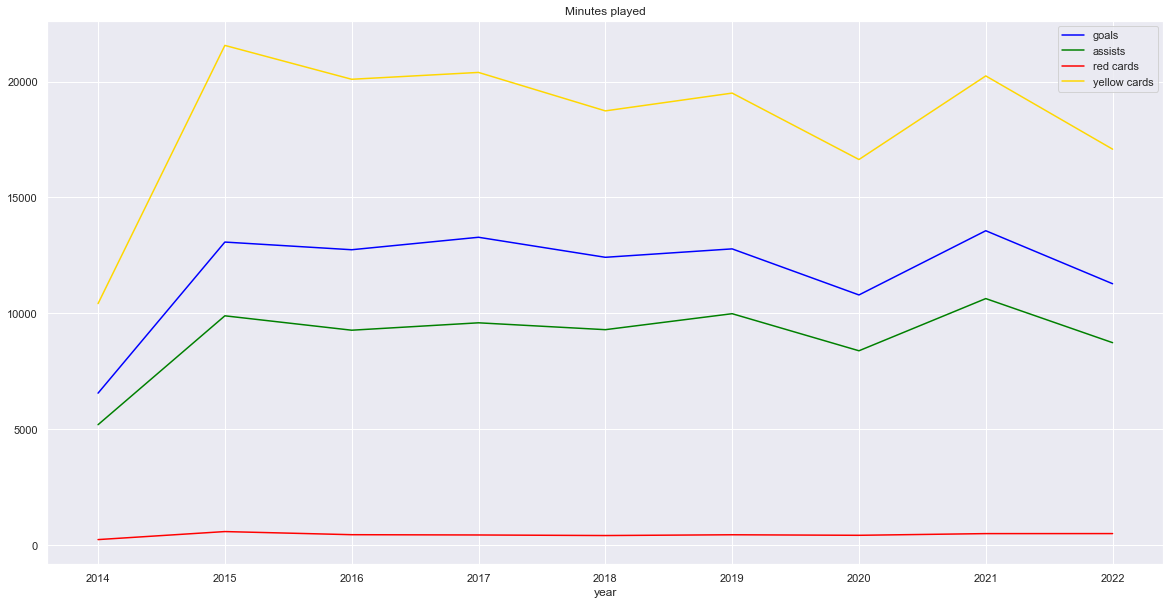

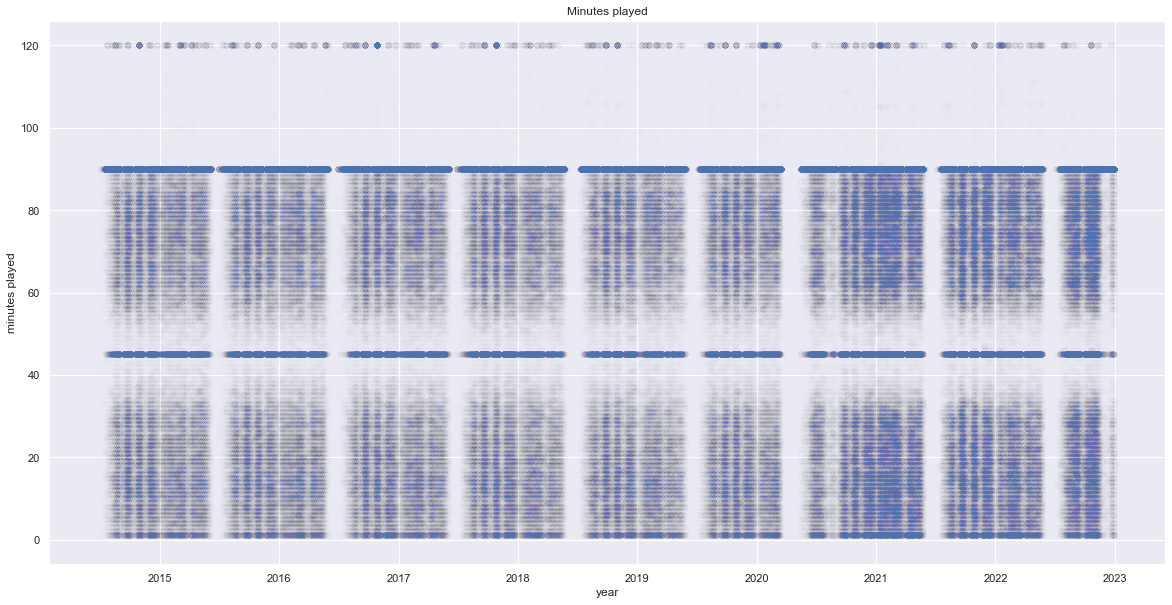

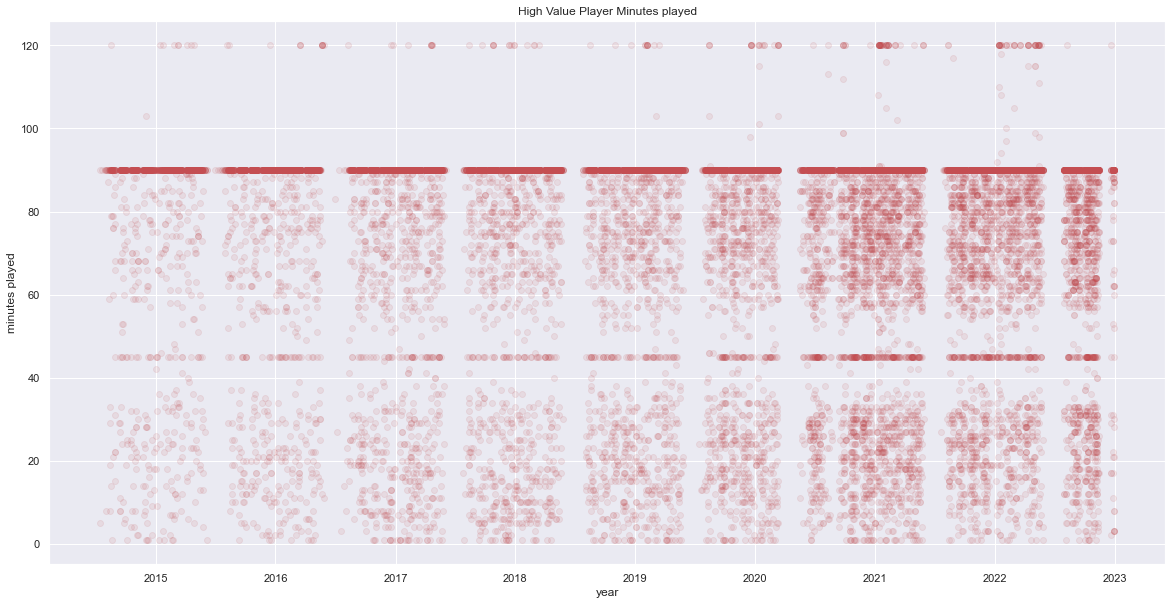

In [63]:
print(appearances_df.columns)
print(appearances_df.shape)
#print(appearances_df.goals.head())
#print(appearances_df.datetime.head())

#filter range
appearances_df = appearances_df[(appearances_df.year > 2004 ) & (appearances_df.year < 2023 )]
high_value_appearances_df = appearances_df1[(appearances_df1.market_value_in_eur > 40000000 )]

#Goals, assists and cards
yeargroups1 = appearances_df.loc[:,['goals', 'year']].groupby(['year']).sum().sort_values(by='year', ascending=True)
yeargroups2 = appearances_df.loc[:,['assists', 'year']].groupby(['year']).sum().sort_values(by='year', ascending=True)
yeargroups3 = appearances_df.loc[:,['red_cards', 'year']].groupby(['year']).sum().sort_values(by='year', ascending=True)
yeargroups4 = appearances_df.loc[:,['yellow_cards', 'year']].groupby(['year']).sum().sort_values(by='year', ascending=True)
plt.plot(yeargroups1.index,yeargroups1,color='blue',label='goals')
plt.plot(yeargroups2.index,yeargroups2,color='green',label='assists')
plt.plot(yeargroups3.index,yeargroups3,color='red',label='red cards')
plt.plot(yeargroups4.index,yeargroups4,color='gold',label='yellow cards')
plt.xlabel("year")
plt.title('Minutes played');plt.legend()
plt.savefig('Graphs/goals_assists_cards.png')
plt.show()

# Explore minutes played
plt.scatter(appearances_df['datetime'],y=appearances_df['minutes_played'],alpha=0.0025,color='b')
plt.xlabel("year");plt.ylabel('minutes played')
plt.title('Minutes played')
plt.show()

# Explore minutes played
plt.scatter(high_value_appearances_df['datetime'],y=high_value_appearances_df['minutes_played'],alpha=0.1,color='r')
plt.xlabel("year");plt.ylabel('minutes played')
plt.title('High Value Player Minutes played')
plt.savefig('Graphs/mainutesplayed.png')
plt.show()

## Observations on appearances

# Game Visualizations

Index(['game_id', 'competition_id', 'competition_type', 'season', 'round', 'date', 'home_club_id', 'away_club_id', 'home_club_goals', 'away_club_goals', 'aggregate', 'home_club_position', 'away_club_position', 'club_home_name', 'club_away_name', 'home_club_manager_name', 'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url', 'datetime', 'year'], dtype='object')
(59715, 23)


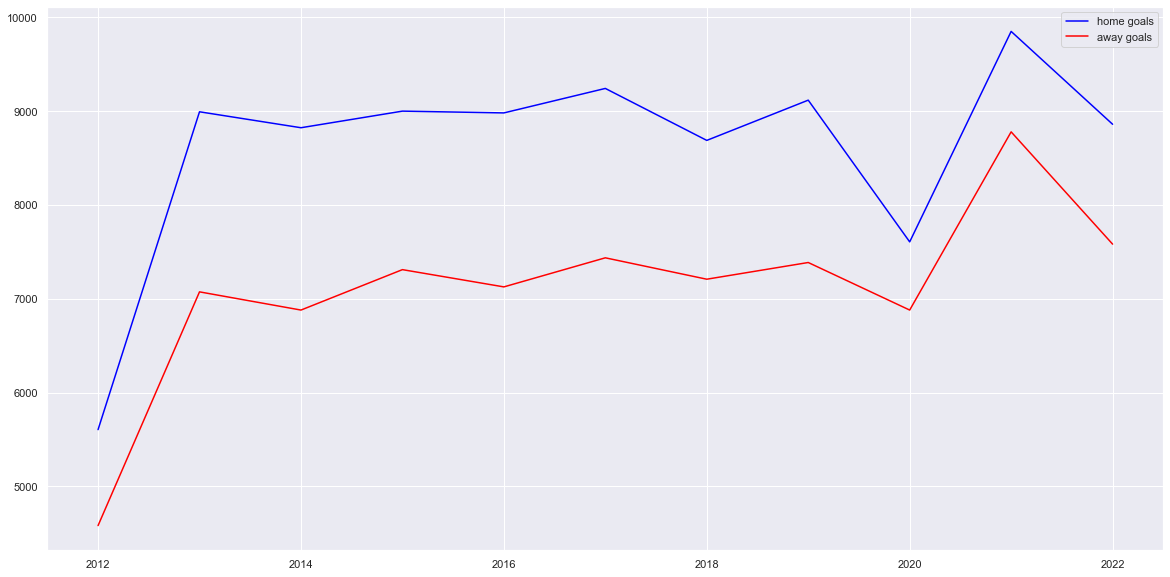

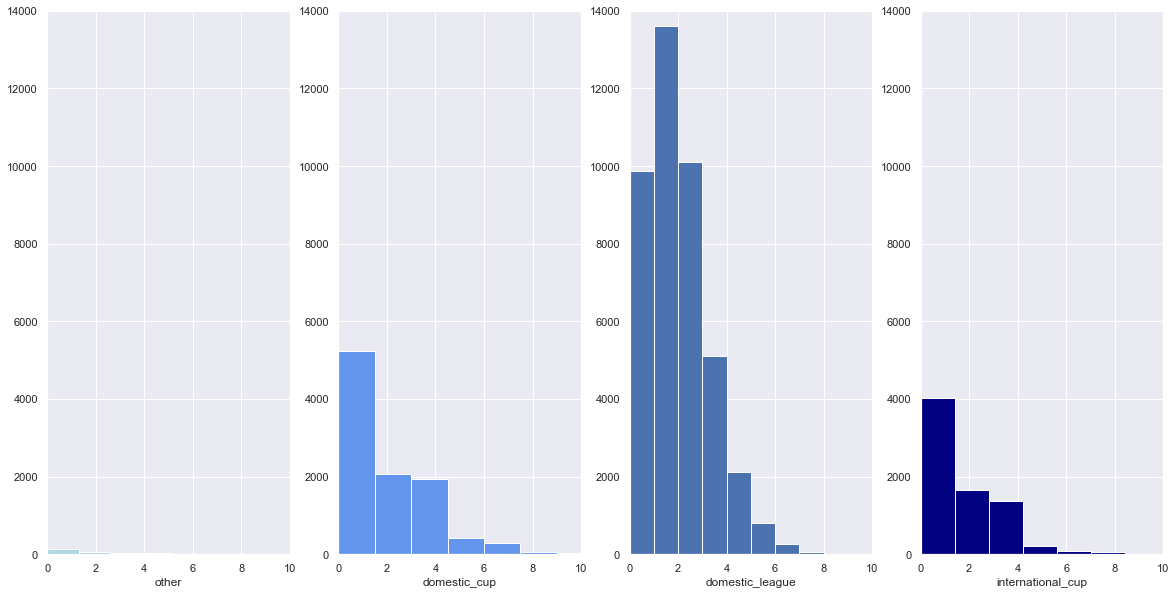

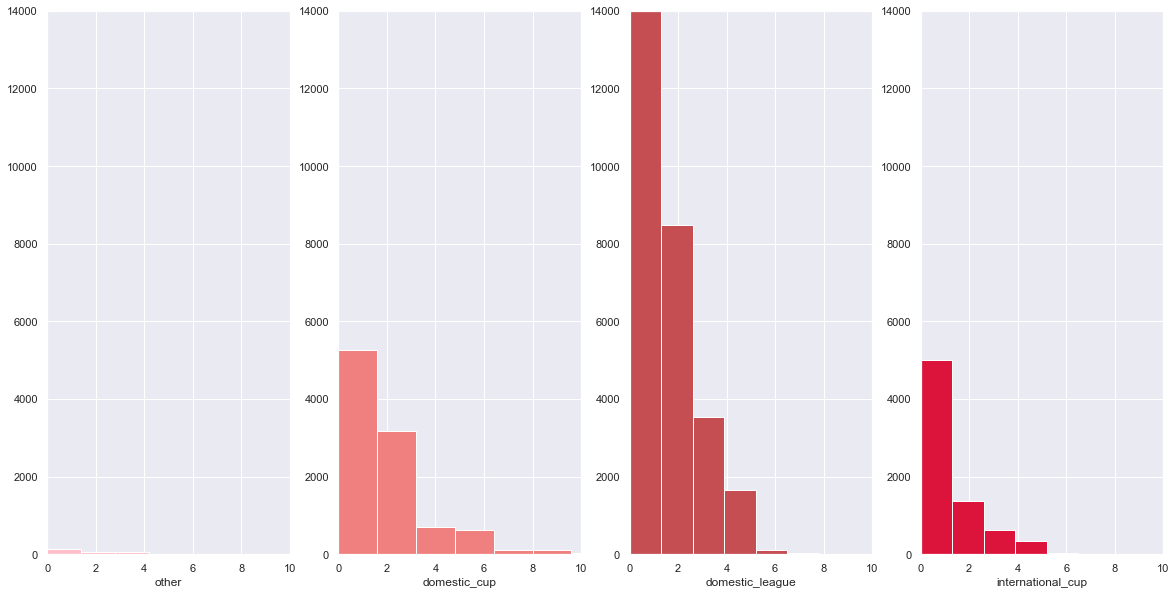

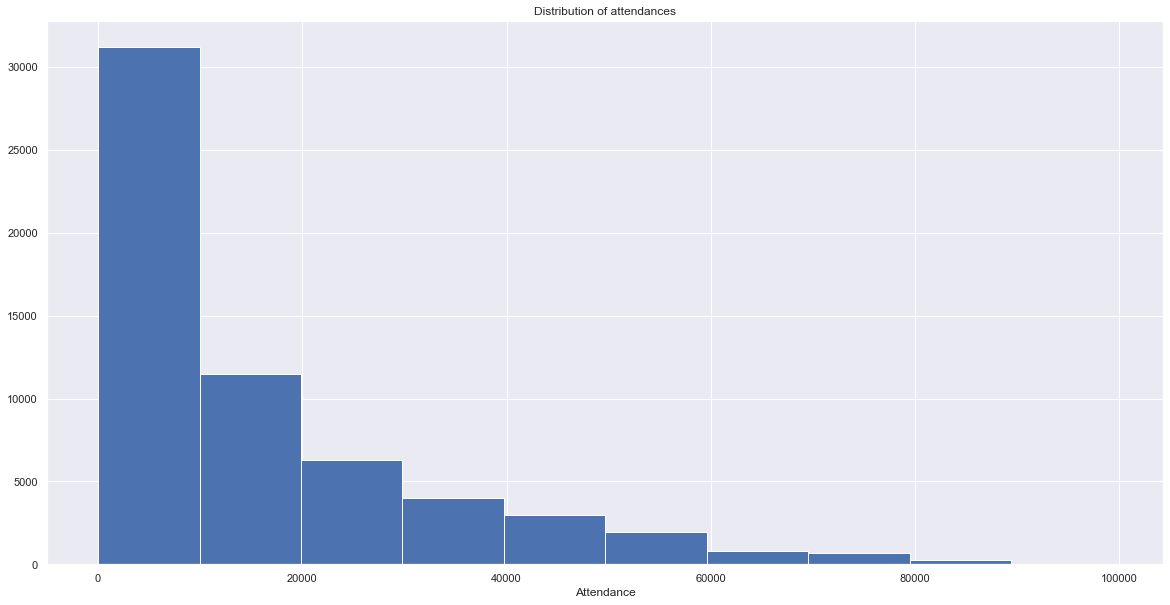

[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


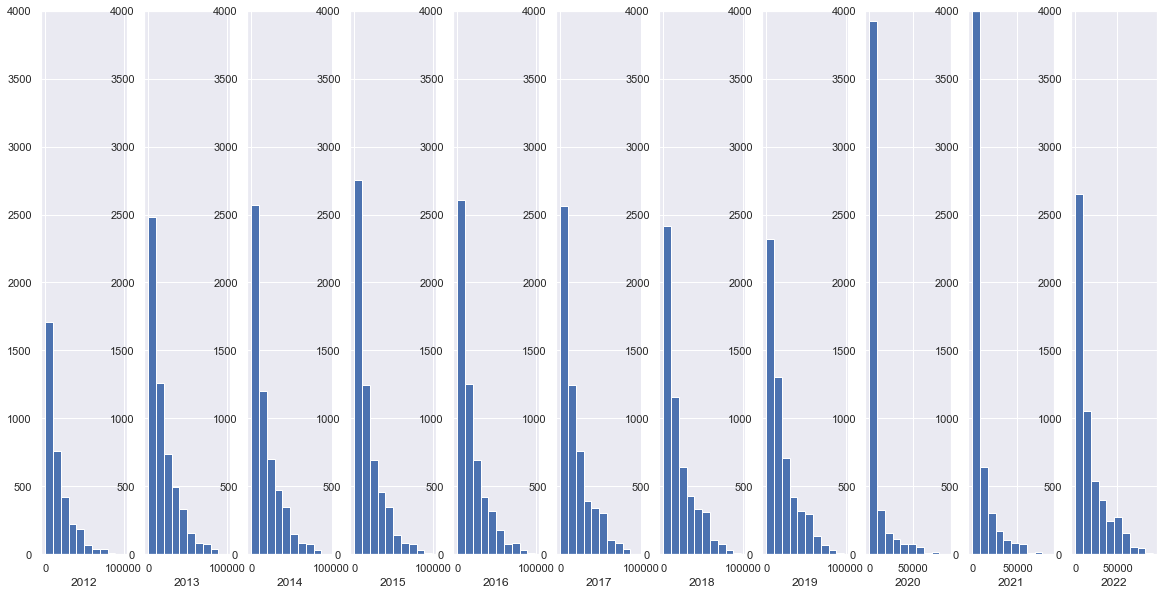

In [123]:
print(games_df.columns)
print(games_df.shape)
#print(games_df.goals.head())
#print(games_df.datetime.head())

#add year to game valuations
games_df['datetime']=pd.to_datetime(games_df['date'], format="%Y-%m-%d")
games_df['year']=games_df['datetime'].dt.year

#filter range
games_df = games_df[(games_df.year > 2004 ) & (games_df.year < 2023 )]

# annual home versus away goals
yeargroups1 = games_df.loc[:,['home_club_goals', 'year']].groupby(['year']).sum().sort_values(by='year', ascending=True)
yeargroups2 = games_df.loc[:,['away_club_goals', 'year']].groupby(['year']).sum().sort_values(by='year', ascending=True)
plt.plot(yeargroups1.index,yeargroups1,color='blue',label='home goals')
plt.plot(yeargroups2.index,yeargroups2,color='red',label='away goals')
plt.legend()
plt.show()

#home goals by competition type
n=1;colour=['b','lightblue','cornflowerblue','b','navy']
competition_type=games_df.competition_type.unique()
for type in competition_type:
    plt.subplot(1,4,n);n=n+1
    games_df1 = games_df[(games_df.competition_type==type)] 
    plt.hist(games_df1['home_club_goals'],color=colour[n-1])
    plt.ylim(0,14000);plt.xlim(0,10)
    plt.xlabel(type)
plt.show()

#away goals by competition type
n=1;colour=['yellow','pink','lightcoral','r','crimson','brick']
for type in competition_type:
    plt.subplot(1,4,n);n=n+1
    games_df1 = games_df[(games_df.competition_type==type)] 
    plt.hist(games_df1['away_club_goals'],color=colour[n-1])
    plt.ylim(0,14000);plt.xlim(0,10)
    plt.xlabel(type)
plt.show()

# distribution of attendances
plt.hist(games_df['attendance'])
plt.title('Distribution of attendances')
plt.xlabel('Attendance')
plt.show()

# valuation by position
n=1;colour=['yellow','r','orange','b','g'];years=games_df['year'].unique()
print(years)
for year in years:
    plt.subplot(1,len(years),n);n=n+1
    attendance_df1 = games_df[(games_df.year==year)]                                             
    plt.hist(attendance_df1['attendance'])
    plt.ylim(0,4000)
    plt.xlabel(year)
plt.show()


## Observations on Goals

The graphs show

## Observations on Attendances

The graphs show that at the bottom end of match attendances (under 10,000 fans)

# Data visualisation of market value by age

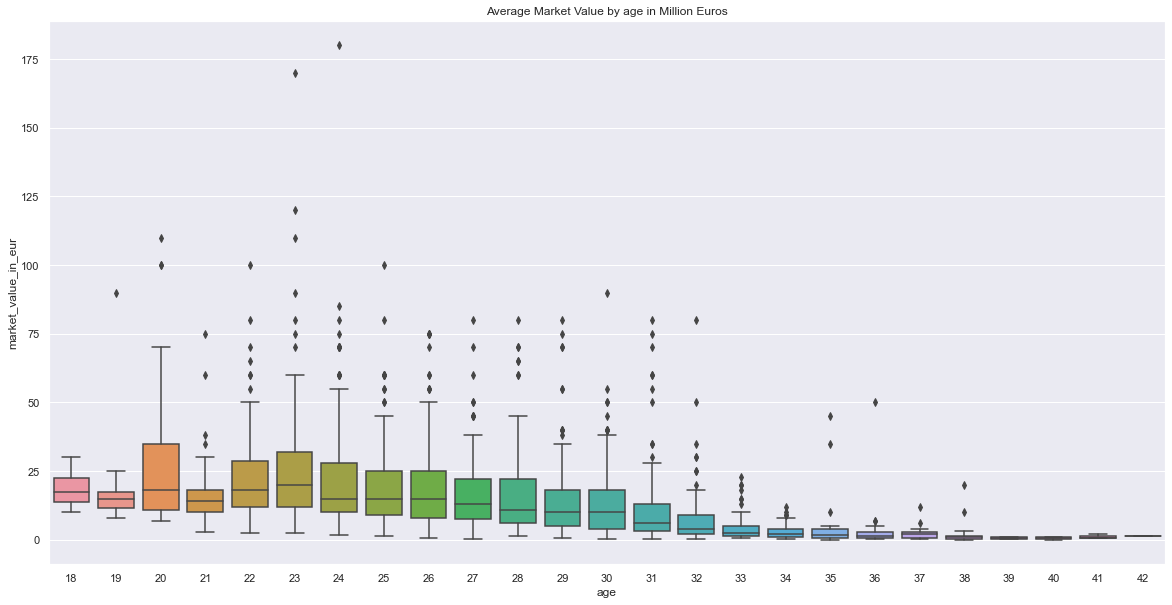

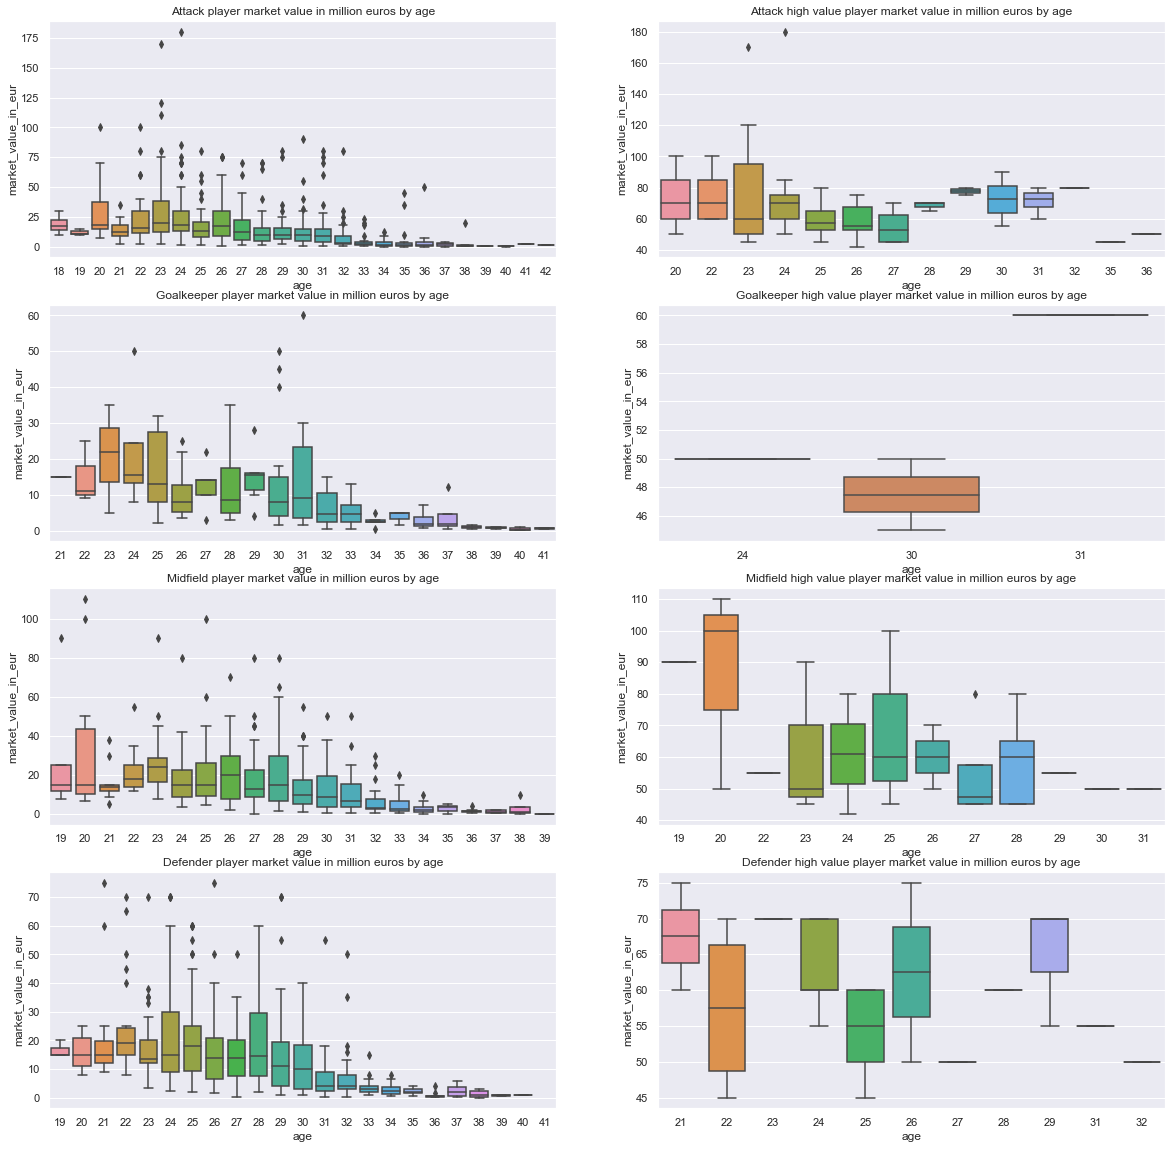

In [7]:
#market value by age
agegroups = players_df1.loc[:,['market_value_in_eur', 'age']] \
    .groupby(['age']) \
    .mean() \
    .sort_values(by='market_value_in_eur', ascending=False)
sns.set(rc={'figure.figsize':(20,10)})
plt.ylabel('Market value')
sns.boxplot(x=players_df1["age"], y=(players_df1['market_value_in_eur'])/1000000)
plt.title('Average Market Value by age in Million Euros')
plt.savefig('Graphs/MarketVauebyAge.png')
plt.show() 
# show Market Value for each position by age
positions=players_df1.position.unique()
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(421);ax2 = f.add_subplot(422);ax3 = f.add_subplot(423);ax4 = f.add_subplot(424)
ax5 = f.add_subplot(425);ax6 = f.add_subplot(426);ax7 = f.add_subplot(427);ax8 = f.add_subplot(428)
n=1
for position in positions:
    plt.subplot(4,2,n); n=n+1 
    players_df2 = players_df1[players_df1['position'] == position]
    agegroups = players_df2.loc[:,['market_value_in_eur', 'age']].groupby(['age']).median().sort_values(by='market_value_in_eur', ascending=False)
    sns.boxplot(x=players_df2["age"], y=(players_df2['market_value_in_eur'])/1000000)
    title=str(position+' player market value in million euros by age');plt.title(title)
    plt.subplot(4,2,n); n=n+1
    high_value_players_df2 = high_value_players_df[high_value_players_df['position'] == position]
    agegroups = high_value_players_df.loc[:,['market_value_in_eur', 'age']].groupby(['age']).median().sort_values(by='market_value_in_eur', ascending=False)
    sns.boxplot(x=high_value_players_df2["age"], y=(high_value_players_df2['market_value_in_eur'])/1000000)
    title=str(position+' high value player market value in million euros by age'); plt.title(title)
plt.show()

## Observations on age

The age distribution of players is a skewed normal distribution starting at 17 years of age and going up 50 with an average age of 29. Players with a market value to over 400,000 euros form a normal distribution ranging from 19 to 32 years of age, with a significant number at age 25.

# Data visualisation of market value by height

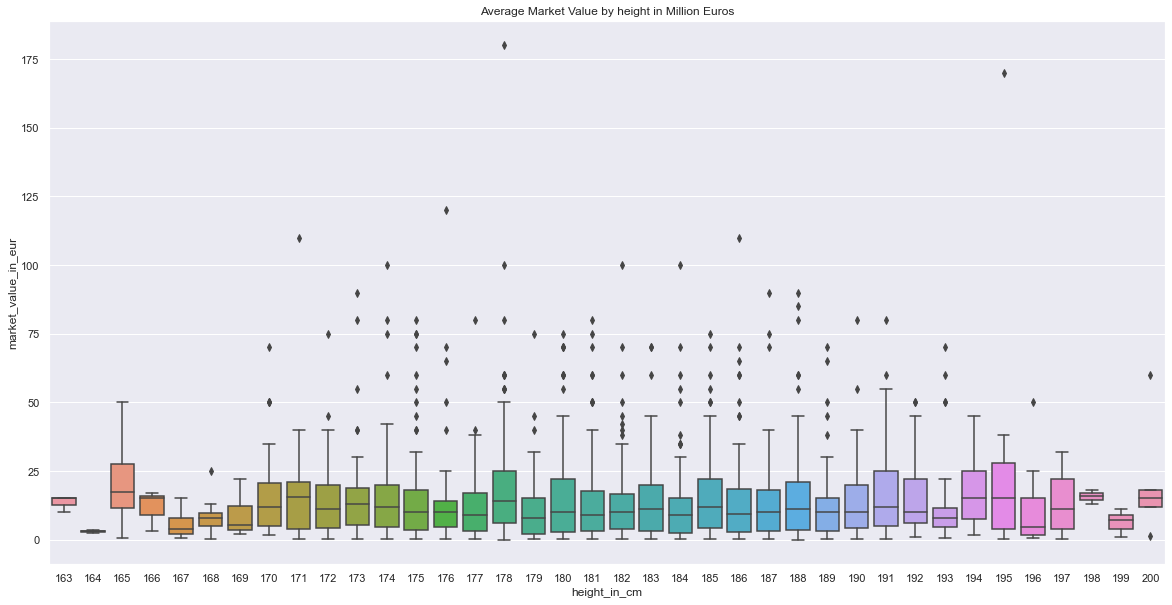

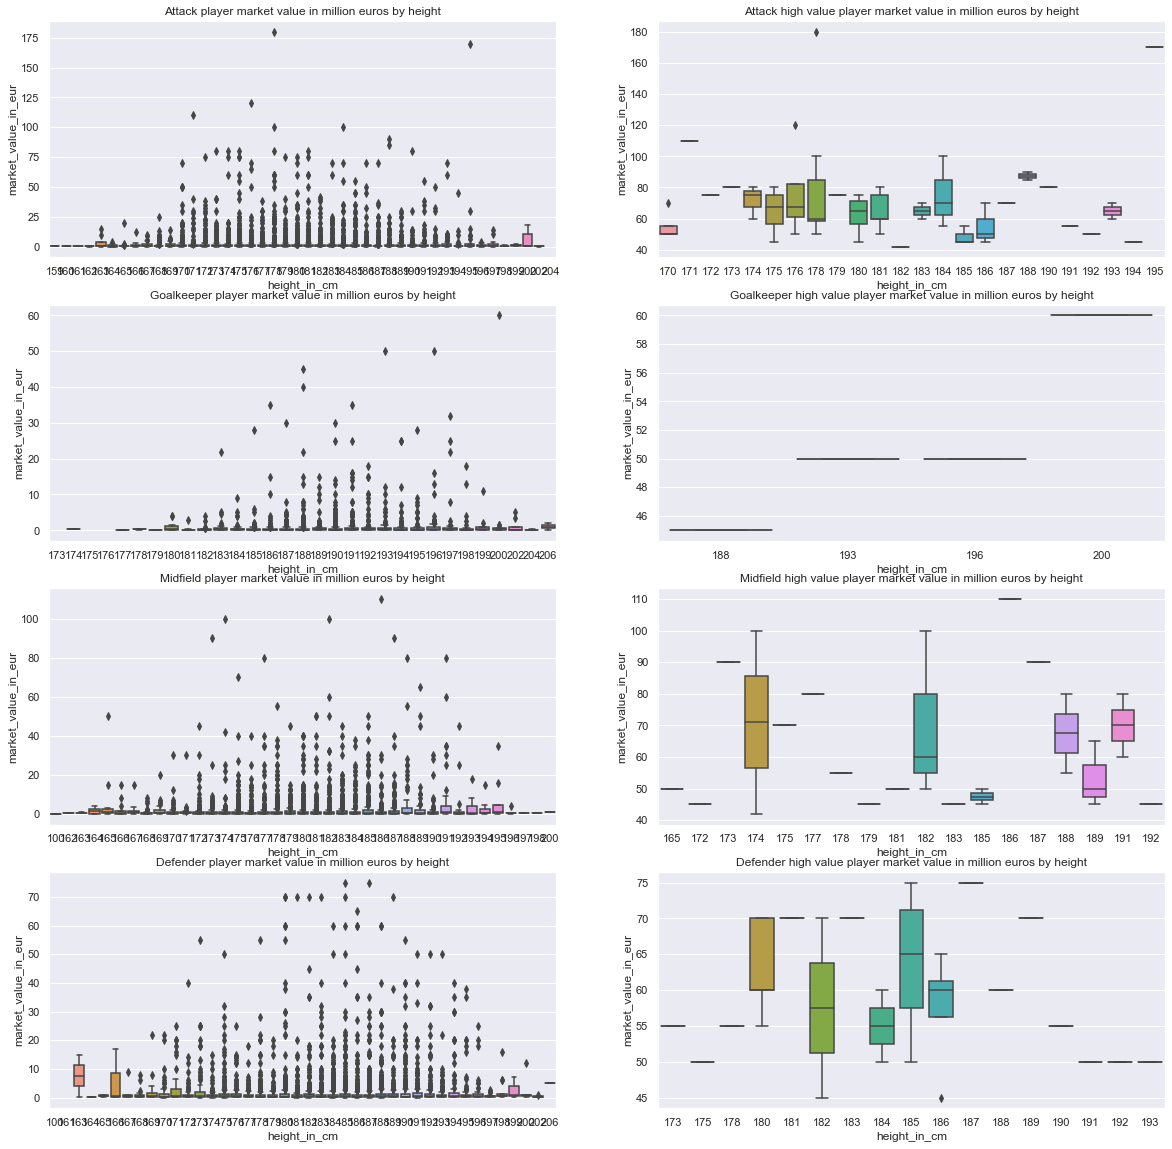

In [8]:
# drop players with no height
players_df3 = players_df[players_df['height_in_cm'] >= 1]

#market value by height
heightgroups = players_df1.loc[:,['market_value_in_eur', 'height_in_cm']] \
    .groupby(['height_in_cm']) \
    .mean() \
    .sort_values(by='market_value_in_eur', ascending=False)
sns.set(rc={'figure.figsize':(20,10)})
plt.ylabel('Market value')
sns.boxplot(x=players_df1["height_in_cm"], y=(players_df1['market_value_in_eur'])/1000000)
plt.title('Average Market Value by height in Million Euros')
plt.savefig('Graphs/MarketVauebyheight.png')
plt.show() 

# show Market Value for each position by height
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(421);ax2 = f.add_subplot(422);ax3 = f.add_subplot(423);ax4 = f.add_subplot(424)
ax5 = f.add_subplot(425);ax6 = f.add_subplot(426);ax7 = f.add_subplot(427);ax8 = f.add_subplot(428)

n=1
for position in positions:
    plt.subplot(4,2,n)
    n=n+1 
    players_df4 = players_df3[players_df3['position'] == position]
    heightgroups = players_df4.loc[:,['market_value_in_eur', 'height_in_cm']] \
    .groupby(['height_in_cm']) \
    .median() \
    .sort_values(by='market_value_in_eur', ascending=False)
    sns.boxplot(x=players_df4["height_in_cm"], y=(players_df4['market_value_in_eur'])/1000000)
    title=str(position+' player market value in million euros by height')
    plt.title(title)
    plt.subplot(4,2,n); n=n+1
    high_value_players_df2 = high_value_players_df[high_value_players_df['position'] == position]
    heightgroups = high_value_players_df2.loc[:,['market_value_in_eur', 'height_in_cm']] \
    .groupby(['height_in_cm']) \
    .median() \
    .sort_values(by='market_value_in_eur', ascending=False)
    sns.boxplot(x=high_value_players_df2["height_in_cm"], y=(high_value_players_df2['market_value_in_eur'])/1000000)
    title=str(position+' high value player market value in million euros by height')
    plt.title(title)
plt.show()

## Observations on height

The height distribution of players is a normal distribution ranging from 160cm to 200cm with an average age of 181cm. The average height for heigh value players is about 1cm taller that the general average.

There are relatively fee high value goal keepers, but they are all tall ranging froom 188 to 200cm.

There appears to be a normal like relationship between height and market value for each position when you look at all players, but does not appear to be any significant relationship between height and market value in the most valuable players.

## Top players by Market Value

In [ ]:
high_value_players_df2=high_value_players_df1.sort_values('market_value_in_eur',ascending = False)
highest_value_players_df2=high_value_players_df1.sort_values('highest_market_value_in_eur',ascending = False)

print((high_value_players_df2[['name',"market_value_in_eur"]]).head(15));print("*****")
print(highest_value_players_df2[['name',"highest_market_value_in_eur"]].head(15));print("*****")

# Statistical Overview

In [704]:
# print info and describe for each dataframe

for i, df in enumerate(dataframes):
    print("***********")
    print(df.info())
    print(df.describe())

***********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   competition_id        43 non-null     object 
 1   competition_code      43 non-null     object 
 2   name                  43 non-null     object 
 3   type                  43 non-null     object 
 4   sub_type              43 non-null     object 
 5   country_id            43 non-null     int64  
 6   country_name          36 non-null     object 
 7   country_latitude      43 non-null     float64
 8   country_longitude     43 non-null     float64
 9   domestic_league_code  36 non-null     object 
 10  confederation         43 non-null     object 
 11  url                   43 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.2+ KB
None
       country_id  country_latitude  country_longitude
count   43.000000         43.000000          43.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60761 entries, 0 to 60760
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   game_id                 60761 non-null  int64 
 1   competition_id          60761 non-null  object
 2   competition_type        60761 non-null  object
 3   season                  60761 non-null  int64 
 4   round                   60761 non-null  object
 5   date                    60761 non-null  object
 6   home_club_id            60761 non-null  int64 
 7   away_club_id            60761 non-null  int64 
 8   home_club_goals         60761 non-null  int64 
 9   away_club_goals         60761 non-null  int64 
 10  aggregate               60761 non-null  object
 11  home_club_position      60761 non-null  int64 
 12  away_club_position      60761 non-null  int64 
 13  club_home_name          50393 non-null  object
 14  club_away_name          51469 non-null  object
 15  ho

## Credits

The data came from:

https://www.kaggle.com/datasets/davidcariboo/player-scores by https://www.kaggle.com/davidcariboo

The following notebooks were really useful:

https://www.kaggle.com/code/luisgasparcordeiro/market-value-eda by https://www.kaggle.com/luisgasparcordeiro